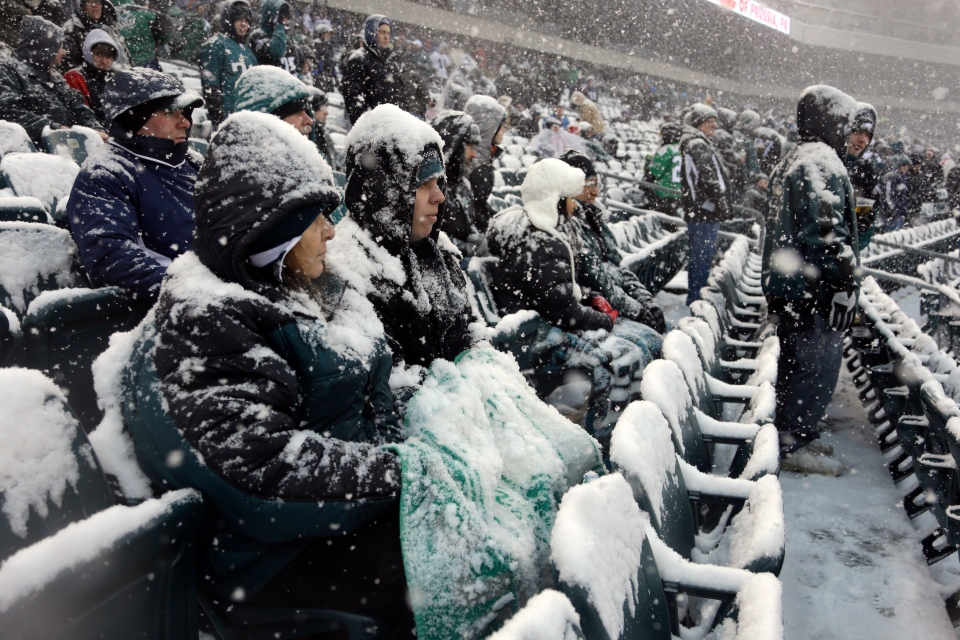

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url_part_one = 'https://www.timeanddate.com/weather/uk/'
url_part_two = ''
url_part_three = '/climate'

In [2]:
def create_BeautifulSoup_For_This_page(this_url):
    url=this_url
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [5]:
clubs_to_cities = pd.read_csv('clubs_to_cities2.csv')
clubs_to_cities = clubs_to_cities.iloc[: , 1:]

In [6]:
lst = clubs_to_cities["city"].tolist()#creating list of the cities clubs by the order so we will have them for the urls

In [9]:
#we found out it matters weather the url gets capital or smaller letter therefore we lowered all cases in the cities list
def change_clubs_cities_list_to_lower(string_list):
    for i in range(len(string_list)):
        string_list[i] = string_list[i].lower()

In [10]:
change_clubs_cities_list_to_lower(lst)
lst=list(dict.fromkeys(lst))

In [13]:
lst

['london',
 'birmingham',
 'barnsley',
 'blackburn',
 'blackpool',
 'bolton',
 'bournemouth',
 'bradford',
 'brighton',
 'burnley',
 'cardiff',
 'coventry',
 'derby',
 'liverpool',
 'huddersfield',
 'kingston',
 'ipswich',
 'leeds',
 'leicester',
 'manchester',
 'middlesbrough',
 'newcastle',
 'norwich',
 'west',
 'oldham',
 'portsmouth',
 'reading',
 'sheffield',
 'southampton',
 'stoke-on-trent',
 'sunderland',
 'swansea',
 'swindon',
 'watford',
 'wigan',
 'wolverhampton']

In [428]:
for url_part_two in lst:
    web_url = url_part_one + url_part_two + url_part_three
    soup=create_BeautifulSoup_For_This_page(web_url)
    four_columns_all = soup.find_all("div", {"class": "four columns"})
    new_list = list(four_columns_all)
    empty_lst = list()
    current_df=pd.DataFrame({"mean_temp":empty_lst, "precipitation":empty_lst})
    current_df=loop_for_this_city(current_df, new_list)
    current_df.to_csv(url_part_two+'_weather_info.csv')

In [429]:
#loop per page to take current city every month average weather
#what we do here is basically we use a crawler that goes with soup object and gets the specific elements we seek for
#then after we got our information, we stash it in dataframe named after the city we chose so we will use it later
#we made counter named iter so we won't have all year average data, we don't need them.
def loop_for_this_city(df, new_list):
    lst=list()
    got_mean = got_pre = 0
    for triples in new_list:
        current_mean_temp=triples.contents[2].get_text()
        if('Mean' in str(current_mean_temp)):
            current_mean_val=int(''.join(c for c in current_mean_temp if c.isdigit()))#cleaning the string to become pure number
            got_mean=1
        current_precipitation=triples.contents[0].get_text()
        if('Precipitation' in str(current_precipitation)):
            current_precipitation_val=int(''.join(c for c in current_precipitation if c.isdigit()))/10#cleaning the string to become pure number
            got_pre=1
        if(got_mean == 1 and got_pre == 1):
            #lst.append((current_mean_val,current_precipitation_val))
            df.loc[df.shape[0]] = [current_mean_val, current_precipitation_val]
            got_mean=got_pre=0
    df = df.iloc[1: , :]
    return df